# Introduction to Optimization via Linear Regression

In this notebook, we will introduce the concept of numerical optimization through linear regression, a model you are likely familiar with.

## The Linear Regression Model

The linear regression model assumes a linear relationship between a response variable $y$ and $p$ predictor variables $x_1, x_2, \ldots, x_p$. For observation $i$, the model is

\begin{equation}
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \cdots + \beta_p x_{pi} + \epsilon_i,
\end{equation}
where $\beta_0, \beta_1, \ldots, \beta_p$ are the model parameters and $\epsilon_i$ represents the error term for observation $i$.

The predicted value for observation $i$ is given by
\begin{equation}
\hat{y}_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \beta_3 x_{3i} + \cdots + \beta_p x_{pi}.
\end{equation}


### Linear Regression in Matrix Form

We can express the linear regression model in matrix form. For $n$ observations, we construct the design matrix
\begin{equation}
X = \begin{bmatrix}
1 & x_{11} & x_{21} & \cdots & x_{p1} \\
1 & x_{12} & x_{22} & \cdots & x_{p2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1n} & x_{2n} & \cdots & x_{pn}
\end{bmatrix},
\end{equation}
where the first column of ones corresponds to the intercept term $\beta_0$. The design matrix $X$ has dimensions $n \times (p+1)$.

Let $\boldsymbol{\beta}$ denote the vector of parameters:
\begin{equation}
\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p
\end{bmatrix},
\end{equation}
and let $\mathbf{y}$ denote the vector of response values:
\begin{equation}
\mathbf{y} = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}.
\end{equation}

The linear regression model can then be written as
\begin{equation}
\mathbf{y} = X\boldsymbol{\beta} + \boldsymbol{\epsilon},
\end{equation}
where $\boldsymbol{\epsilon}$ is the vector of error terms.

The prediction can be written as:
\begin{equation}
\hat{\mathbf{y}} = X\boldsymbol{\beta}.
\end{equation}

**Machine Learning Notation**

In machine learning contexts, the model is often written using different notation. The design matrix is denoted $W$ (for weights) and the intercept is separated as a bias term $\mathbf{b}$. In this notation, the design matrix contains only the predictor variables without the column of ones, and the model becomes
\begin{equation}
\mathbf{y} = W\mathbf{x} + \mathbf{b},
\end{equation}
where $W$ contains the slope parameters and $\mathbf{b}$ represents the intercept.

## Mean Square Error Loss Function

The loss function measures how well the model fits the data. For linear regression, we use the mean squared error (MSE):
\begin{equation}
L(\boldsymbol{\beta}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{1i} - \cdots - \beta_p x_{pi})^2.
\end{equation}

In matrix form, the loss function becomes
\begin{equation}
L(\boldsymbol{\beta}) = \frac{1}{n} \|\mathbf{y} - X\boldsymbol{\beta}\|^2.
\end{equation}

The loss function is zero when we have a perfect fit, meaning the model predictions exactly match the observed data. As the fit worsens, the loss function increases.

The optimization problem is to determine the parameters $\boldsymbol{\beta}$ that minimize the loss function:
\begin{equation}
\boldsymbol{\beta}^* = \arg\min_{\boldsymbol{\beta}} L(\boldsymbol{\beta}).
\end{equation}

**Important terminology note:** In this course, when I say we need to "solve the linear regression problem," I mean we need to find the parameter vector $\boldsymbol{\beta}$ that minimizes the loss function. This is a numerical methods question about how to compute the optimal parameters efficiently and accurately. I do **not** mean simply implementing linear regression using a library function. Furthermore, just because we found the best-fitting model parameters does not mean we have a good prediction model; perhaps the data are not linearly related, in which case a linear model would not provide accurate predictions.

Below is an interactive demonstration showing how the loss function works for simple linear regression. We generate data with known parameters for the coefficients $\beta_0$ (intercept) and $\beta_1$ (slope). For pedagogical purposes, we assume $\beta_0$ is known and fixed at its true value. You can adjust the value of $\beta_1$ using the slider and observe how the loss function changes. Watch how the orange line (current fit) changes in the top panel and how the orange bead moves along the loss curve in the bottom panel. The goal is to find the value of $\beta_1$ that minimizes the loss function—can you identify it visually? 

In [20]:
import numpy as np
import plotly.io as pio
pio.renderers.default = "notebook"
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Generate synthetic data with known parameters
np.random.seed(42)
true_beta_0 = 1.0  # True intercept (FIXED)
true_beta_1 = 2.5  # True slope (what we're searching for)
n_points = 30

x = np.linspace(0, 10, n_points)
y_true = true_beta_0 + true_beta_1 * x
y_data = y_true + np.random.normal(0, 1.5, n_points)

# Array of beta_1 values to test (slope values)
beta_1_values = np.linspace(0, 5, 100)

# Calculate loss for each beta_1 value (with beta_0 fixed)
losses = []
for beta_1 in beta_1_values:
    y_pred = true_beta_0 + beta_1 * x
    loss = np.mean((y_data - y_pred)**2)
    losses.append(loss)

# Find optimal beta_1 (minimum loss)
optimal_idx = np.argmin(losses)
optimal_beta_1 = beta_1_values[optimal_idx]
optimal_loss = losses[optimal_idx]

# # Create 2x1 subplot figure
# fig = make_subplots(
#     rows=2, cols=1,
#     subplot_titles=("Data and Fitted Line", "Loss Function (MSE vs Slope β₁)"),
#     vertical_spacing=0.15,
#     row_heights=[0.5, 0.5]
# )

# # TOP PANEL: Data and fitted line
# # Add data points (fixed)
# fig.add_trace(
#     go.Scatter(x=x, y=y_data, mode='markers', name='Data',
#                marker=dict(size=8, color='blue', opacity=0.6)),
#     row=1, col=1
# )

# # Add true model line (for reference, fixed)
# fig.add_trace(
#     go.Scatter(x=x, y=y_true, mode='lines', name='True Model',
#                line=dict(color='green', dash='dash', width=2)),
#     row=1, col=1
# )

# # Add initial fitted line (will be updated by slider)
# initial_beta_1 = beta_1_values[0]
# y_pred_initial = true_beta_0 + initial_beta_1 * x
# fig.add_trace(
#     go.Scatter(x=x, y=y_pred_initial, mode='lines', name='Current Fit',
#                line=dict(color='orange', width=3)),
#     row=1, col=1
# )

# # BOTTOM PANEL: Loss function
# # Add loss curve (fixed)
# fig.add_trace(
#     go.Scatter(x=beta_1_values, y=losses, mode='lines', name='Loss Function',
#                line=dict(color='red', width=2)),
#     row=2, col=1
# )

# # Add moving bead on loss curve (will be updated by slider)
# fig.add_trace(
#     go.Scatter(x=[initial_beta_1], y=[losses[0]], mode='markers',
#                name='Current Position',
#                marker=dict(size=15, color='orange', symbol='circle',
#                           line=dict(width=2, color='black'))),
#     row=2, col=1
# )

# # Mark the optimal point
# fig.add_trace(
#     go.Scatter(x=[optimal_beta_1], y=[optimal_loss], mode='markers',
#                name='Optimal β₁',
#                marker=dict(size=12, color='green', symbol='star',
#                           line=dict(width=2, color='darkgreen'))),
#     row=2, col=1
# )

# # Create frames for slider animation
# frames = []
# for i, beta_1 in enumerate(beta_1_values[::2]):  # Every other value for smoother performance
#     y_pred = true_beta_0 + beta_1 * x
#     loss = losses[i*2]
    
#     frames.append(go.Frame(
#         data=[
#             # Traces 0-2: Top panel (data, true line, fitted line)
#             go.Scatter(x=x, y=y_data, mode='markers'),
#             go.Scatter(x=x, y=y_true, mode='lines'),
#             go.Scatter(x=x, y=y_pred, mode='lines',
#                       line=dict(color='orange', width=3)),
#             # Traces 3-5: Bottom panel (loss curve, current bead, optimal marker)
#             go.Scatter(x=beta_1_values, y=losses, mode='lines'),
#             go.Scatter(x=[beta_1], y=[loss], mode='markers',
#                       marker=dict(size=15, color='orange', symbol='circle',
#                                 line=dict(width=2, color='black'))),
#             go.Scatter(x=[optimal_beta_1], y=[optimal_loss], mode='markers')
#         ],
#         name=f'{beta_1:.2f}'
#     ))

# # Add frames to figure
# fig.frames = frames

# # Add slider
# sliders = [dict(
#     active=0,
#     yanchor="top",
#     y=-0.05,
#     xanchor="left",
#     x=0.1,
#     currentvalue=dict(
#         prefix="Slope β₁ = ",
#         visible=True,
#         xanchor="center",
#         font=dict(size=14)
#     ),
#     pad=dict(b=10, t=50),
#     len=0.8,
#     steps=[dict(
#         args=[[f.name], dict(
#             frame=dict(duration=0, redraw=True),
#             mode="immediate",
#             transition=dict(duration=0)
#         )],
#         label=f'{float(f.name):.2f}',
#         method="animate"
#     ) for f in frames]
# )]

# # Update layout
# fig.update_layout(
#     sliders=sliders,
#     height=800,
#     width=900,
#     showlegend=True,
#     title_text=f"Linear Regression Parameter Search (Intercept β₀ = {true_beta_0:.1f}, True Slope β₁ = {true_beta_1:.1f})",
#     title_x=0.5,
#     title_font=dict(size=16)
# )

# # Update axes labels
# fig.update_xaxes(title_text="x", row=1, col=1, title_font=dict(size=14))
# fig.update_yaxes(title_text="y", row=1, col=1, title_font=dict(size=14))
# fig.update_xaxes(title_text="Slope β₁", row=2, col=1, title_font=dict(size=14))
# fig.update_yaxes(title_text="Loss (MSE)", row=2, col=1, title_font=dict(size=14))

# fig.show()

# # Saving, to open in another cell. 
# fig.write_html("parameter_search.html", include_plotlyjs='cdn')


In [21]:
from IPython.display import IFrame, display

display(IFrame(src='parameter_search.html', width=920, height=850))

**Problem 1**

When plotted, why is the loss function quadratic?

<details>
<summary>Solution</summary>

The loss function for linear regression is the mean squared error (MSE):
$$L(\beta_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2$$

Since we've fixed $\beta_0$ at its true value, the loss function depends only on $\beta_1$. Let's examine the structure of this function.

For each data point, the residual is:
$$r_i = y_i - \beta_0 - \beta_1 x_i$$

This is a **linear function** of $\beta_1$. When we square this linear function:
$$r_i^2 = (y_i - \beta_0 - \beta_1 x_i)^2$$

we get a **quadratic function** in $\beta_1$. Expanding:
$$r_i^2 = (y_i - \beta_0)^2 - 2(y_i - \beta_0)x_i \beta_1 + x_i^2 \beta_1^2$$

This has the form $a + b\beta_1 + c\beta_1^2$, which is quadratic.

The loss function is the average of these squared residuals:
$$L(\beta_1) = \frac{1}{n} \sum_{i=1}^{n} r_i^2 = A + B\beta_1 + C\beta_1^2$$

where $A$, $B$, and $C$ are constants (sums involving the data). This is a **quadratic function** in $\beta_1$, which explains the parabolic shape you see in the plot.

</details>

---

The mean squared error is a quadratic function. It is the mean of the squared residual errors of the model output compared to the target data. Below is a surface plot of the mean squared error for simple linear regression, where the two axes represent $\beta_0$ (intercept) and $\beta_1$ (slope).

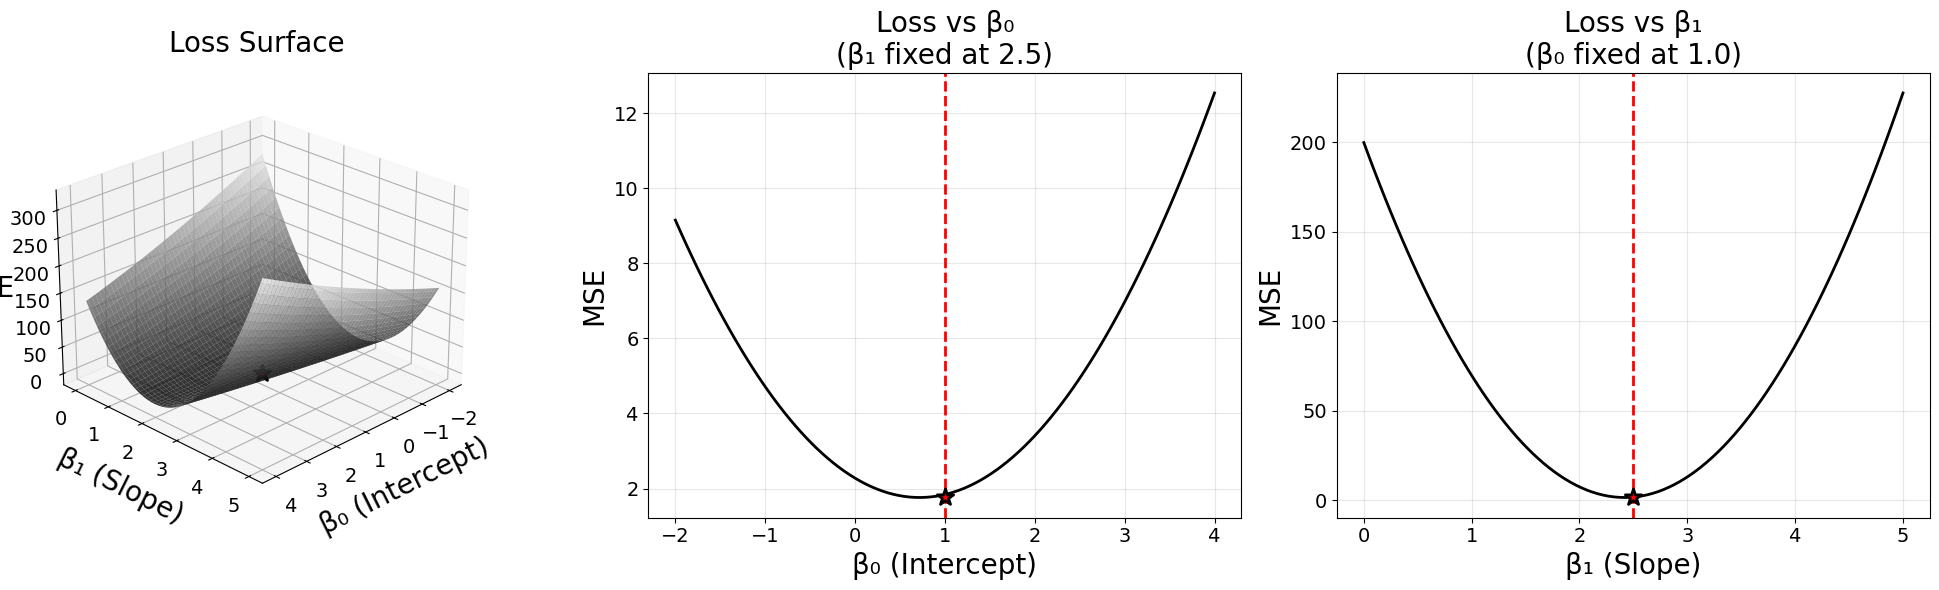

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use the same data generation as before
np.random.seed(42)
true_beta_0 = 1.0  # True intercept
true_beta_1 = 2.5  # True slope
n_points = 30

x = np.linspace(0, 10, n_points)
y_true = true_beta_0 + true_beta_1 * x
y_data = y_true + np.random.normal(0, 1.5, n_points)

# Create arrays for beta_0 and beta_1
beta_0_values = np.linspace(-2, 4, 100)
beta_1_values = np.linspace(0, 5, 100)

# Create meshgrid for surface plot
Beta_0, Beta_1 = np.meshgrid(beta_0_values, beta_1_values)

# Calculate MSE for each combination of beta_0 and beta_1
MSE = np.zeros_like(Beta_0)
for i in range(len(beta_0_values)):
    for j in range(len(beta_1_values)):
        y_pred = beta_0_values[i] + beta_1_values[j] * x
        MSE[j, i] = np.mean((y_data - y_pred)**2)

# Calculate MSE as function of beta_0 (with beta_1 fixed at true value)
mse_vs_beta_0 = []
for beta_0 in beta_0_values:
    y_pred = beta_0 + true_beta_1 * x
    mse_vs_beta_0.append(np.mean((y_data - y_pred)**2))

# Calculate MSE as function of beta_1 (with beta_0 fixed at true value)
mse_vs_beta_1 = []
for beta_1 in beta_1_values:
    y_pred = true_beta_0 + beta_1 * x
    mse_vs_beta_1.append(np.mean((y_data - y_pred)**2))

# Create 1x3 subplot figure
fig = plt.figure(figsize=(20, 6))

# FIRST PANEL: 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(Beta_0, Beta_1, MSE, cmap='gray', 
                        alpha=0.8, edgecolor='none')

# Mark the true parameters (no legend)
true_mse = np.mean((y_data - y_true)**2)
ax1.scatter([true_beta_0], [true_beta_1], [true_mse], 
           color='red', s=150, marker='*', 
           edgecolors='black', linewidths=2)

ax1.set_xlabel('β₀ (Intercept)', fontsize=20, labelpad=10)
ax1.set_ylabel('β₁ (Slope)', fontsize=20, labelpad=10)
ax1.set_zlabel('MSE', fontsize=20, labelpad=10)
ax1.set_title('Loss Surface', fontsize=20, pad=15)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='z', labelsize=14)
ax1.view_init(elev=25, azim=45)

# SECOND PANEL: Loss vs β₀ (β₁ fixed)
ax2 = fig.add_subplot(132)
ax2.plot(beta_0_values, mse_vs_beta_0, 'k-', linewidth=2)
ax2.axvline(true_beta_0, color='red', linestyle='--', linewidth=2, 
            label=f'True β₀ = {true_beta_0}')
ax2.scatter([true_beta_0], [min(mse_vs_beta_0)], color='red', s=150, 
           marker='*', edgecolors='black', linewidths=2, zorder=5)
ax2.set_xlabel('β₀ (Intercept)', fontsize=20)
ax2.set_ylabel('MSE', fontsize=20)
ax2.set_title(f'Loss vs β₀\n(β₁ fixed at {true_beta_1})', fontsize=20)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', labelsize=14)

# THIRD PANEL: Loss vs β₁ (β₀ fixed)
ax3 = fig.add_subplot(133)
ax3.plot(beta_1_values, mse_vs_beta_1, 'k-', linewidth=2)
ax3.axvline(true_beta_1, color='red', linestyle='--', linewidth=2, 
            label=f'True β₁ = {true_beta_1}')
ax3.scatter([true_beta_1], [min(mse_vs_beta_1)], color='red', s=150, 
           marker='*', edgecolors='black', linewidths=2, zorder=5)
ax3.set_xlabel('β₁ (Slope)', fontsize=20)
ax3.set_ylabel('MSE', fontsize=20)
ax3.set_title(f'Loss vs β₁\n(β₀ fixed at {true_beta_0})', fontsize=20)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='both', labelsize=14)

plt.tight_layout()


## The Linear Regression Optimization Problem 

The optimization problem is solved when the gradient of the loss function is zero. Recall that in single-variable calculus, to find the minimum of a function $f(x)$, we compute the derivative $f'(x)$ and set it equal to zero:
\begin{equation}
f'(x) = 0.
\end{equation}

Likewise, for multivariable functions, we use the same principle with gradients instead of derivatives. The gradient of $L(\boldsymbol{\beta})$ with respect to $\boldsymbol{\beta}$ must be zero at the minimum:
\begin{equation}
\nabla_{\boldsymbol{\beta}} L(\boldsymbol{\beta}) = \mathbf{0}.
\end{equation}

## The Normal Equations

We now compute the gradient of the loss function. Starting with
\begin{equation}
L(\boldsymbol{\beta}) = \frac{1}{n} \|\mathbf{y} - X\boldsymbol{\beta}\|^2,
\end{equation}
we expand the squared norm:
\begin{equation}
L(\boldsymbol{\beta}) = \frac{1}{n} (\mathbf{y} - X\boldsymbol{\beta})^T (\mathbf{y} - X\boldsymbol{\beta}).
\end{equation}

Expanding this expression gives
\begin{equation}
L(\boldsymbol{\beta}) = \frac{1}{n} (\mathbf{y}^T\mathbf{y} - \mathbf{y}^T X\boldsymbol{\beta} - \boldsymbol{\beta}^T X^T \mathbf{y} + \boldsymbol{\beta}^T X^T X \boldsymbol{\beta}).
\end{equation}

Since $\mathbf{y}^T X\boldsymbol{\beta}$ is a scalar, it equals its transpose, so $\mathbf{y}^T X\boldsymbol{\beta} = \boldsymbol{\beta}^T X^T \mathbf{y}$. Therefore:
\begin{equation}
L(\boldsymbol{\beta}) = \frac{1}{n} (\mathbf{y}^T\mathbf{y} - 2\boldsymbol{\beta}^T X^T \mathbf{y} + \boldsymbol{\beta}^T X^T X \boldsymbol{\beta}).
\end{equation}

We now compute the gradient with respect to $\boldsymbol{\beta}$. Using standard matrix calculus identities:
\begin{align}
\nabla_{\boldsymbol{\beta}} (\mathbf{y}^T\mathbf{y}) &= \mathbf{0}, \\
\nabla_{\boldsymbol{\beta}} (\boldsymbol{\beta}^T X^T \mathbf{y}) &= X^T \mathbf{y}, \\
\nabla_{\boldsymbol{\beta}} (\boldsymbol{\beta}^T X^T X \boldsymbol{\beta}) &= 2 X^T X \boldsymbol{\beta},
\end{align}
we obtain
\begin{equation}
\nabla_{\boldsymbol{\beta}} L(\boldsymbol{\beta}) = \frac{1}{n} (-2 X^T \mathbf{y} + 2 X^T X \boldsymbol{\beta}).
\end{equation}

Setting the gradient equal to zero gives
\begin{equation}
-2 X^T \mathbf{y} + 2 X^T X \boldsymbol{\beta} = \mathbf{0}.
\end{equation}

Simplifying, we obtain the normal equations:
\begin{equation}
X^T X \boldsymbol{\beta} = X^T \mathbf{y}.
\end{equation}

The normal equations form a system of linear equations. The matrix $X^T X$ has dimensions $(p+1) \times (p+1)$, the unknown parameter vector $\boldsymbol{\beta}$ has dimension $p+1$, and the right-hand side $X^T \mathbf{y}$ has dimension $p+1$. Therefore, we have a square system of $p+1$ equations in $p+1$ unknowns.

The normal equations $X^T X \boldsymbol{\beta} = X^T \mathbf{y}$ can be solved using matrix factorization methods.

---

**Problem 2**

The normal equations have the form $A\mathbf{x}=\mathbf{b}$. This means they can be solved with techniques we have learned for systems of equations. What is playing the role of $A$, $\mathbf{x}$, and $\mathbf{b}$ in the normal equations?

<details>
<summary>Solution</summary>

In the normal equations $X^T X \boldsymbol{\beta} = X^T \mathbf{y}$:

- $A = X^T X$ (the coefficient matrix)
- $\mathbf{x} = \boldsymbol{\beta}$ (the unknown parameter vector we're solving for)
- $\mathbf{b} = X^T \mathbf{y}$ (the right-hand side vector)

This is a square system of $(p+1)$ equations in $(p+1)$ unknowns, where $p+1$ is the number of parameters (including the intercept).

</details>

---

Each method has different computational properties and numerical stability characteristics.

**Cholesky Factorization**

The matrix $X^T X$ is symmetric. To see this, observe that
\begin{equation}
(X^T X)^T = X^T (X^T)^T = X^T X,
\end{equation}
so the matrix equals its own transpose. This symmetry is central to the Cholesky factorization, which applies specifically to symmetric matrices.

If $X$ has full column rank, then $X^T X$ is symmetric positive definite. To show positive definiteness, we must verify that for any nonzero vector $\mathbf{v} \in \mathbb{R}^{p+1}$, we have $\mathbf{v}^T (X^T X) \mathbf{v} > 0$. 

Consider
\begin{equation}
\mathbf{v}^T (X^T X) \mathbf{v} = \mathbf{v}^T X^T X \mathbf{v} = (X\mathbf{v})^T (X\mathbf{v}) = \|X\mathbf{v}\|^2.
\end{equation}

Since $\|X\mathbf{v}\|^2 \geq 0$ for any vector $\mathbf{v}$, the matrix $X^T X$ is at least positive semidefinite. To show it is positive definite, we need $\|X\mathbf{v}\|^2 > 0$ for all nonzero $\mathbf{v}$. 

When $X$ has full column rank, the columns of $X$ are linearly independent. This means that $X\mathbf{v} = \mathbf{0}$ only when $\mathbf{v} = \mathbf{0}$. Therefore, for any nonzero vector $\mathbf{v}$, we have $X\mathbf{v} \neq \mathbf{0}$, which implies $\|X\mathbf{v}\|^2 > 0$. Thus $X^T X$ is positive definite when $X$ has full column rank.

---

**Problem 3**

The matrix $X$ does not always have full column rank in practice. Common scenarios where rank deficiency occurs include having fewer observations than parameters ($n < p+1$), perfectly correlated predictors, or including redundant features.

a) Suppose you have a dataset with a temperature variable measured in Celsius, and you create a new feature for temperature in Fahrenheit using the conversion formula $F = \frac{9}{5}C + 32$. If you include both the Celsius and Fahrenheit variables as predictors in your design matrix $X$ (along with an intercept term), will $X$ have full column rank? Why or why not? What does this imply about the matrix $X^T X$?

b) When can we use Cholesky factorization to solve the normal equations? What property must $X^T X$ satisfy?

<details>
<summary>Solution</summary>

**Part a):**

No, $X$ will **not** have full column rank. 

The Fahrenheit column is a linear combination of the Celsius column and the intercept column:
$$F = \frac{9}{5}C + 32 = \frac{9}{5}C + 32 \cdot \mathbf{1}$$

where $\mathbf{1}$ represents the intercept column (all ones). This means the columns are linearly dependent, so $X$ is rank deficient.

Since $X$ does not have full column rank, $X^T X$ is only **positive semidefinite** (not positive definite), meaning it is singular (non-invertible). The normal equations do not have a unique solution in this case.

**Part b):**

We can use Cholesky factorization when $X^T X$ is **symmetric positive definite**. This requires:

1. $X^T X$ must be symmetric (always true by construction)
2. $X^T X$ must be positive definite, which requires $X$ to have **full column rank**

**Conditions for full column rank:**
- The number of observations must be at least as large as the number of parameters: $n \geq p+1$
- No predictor variable can be a linear combination of the others
- No perfectly correlated features

If $X$ is rank deficient, Cholesky factorization will fail, and we should use SVD instead, which naturally handles rank deficiency.

</details>

---

When $X$ is rank deficient, $X^T X$ is only positive semidefinite (not positive definite), and the Cholesky factorization may fail. In such cases, the SVD method is preferred because it naturally handles rank deficiency and can compute a solution even when $X^T X$ is singular.

We can compute the Cholesky factorization
\begin{equation}
X^T X = R^T R,
\end{equation}
where $R$ is an upper triangular matrix. The normal equations become
\begin{equation}
R^T R \boldsymbol{\beta} = X^T \mathbf{y}.
\end{equation}

**QR Factorization**

We can compute the QR factorization of the design matrix
\begin{equation}
X = QR,
\end{equation}
where $Q$ is an $n \times (p+1)$ matrix with orthonormal columns and $R$ is a $(p+1) \times (p+1)$ upper triangular matrix. Substituting into the normal equations gives
\begin{equation}
(QR)^T QR \boldsymbol{\beta} = (QR)^T \mathbf{y}.
\end{equation}

Since $Q^T Q = I$, this simplifies to
\begin{equation}
R^T R \boldsymbol{\beta} = R^T Q^T \mathbf{y}.
\end{equation}

Multiplying both sides by $(R^T)^{-1}$ yields
\begin{equation}
R \boldsymbol{\beta} = Q^T \mathbf{y}.
\end{equation}

We solve this upper triangular system using backward substitution. The QR approach is more numerically stable than forming $X^T X$ explicitly because it avoids squaring the condition number.

**Singular Value Decomposition (SVD)**

The SVD of the design matrix is
\begin{equation}
X = U \Sigma V^T,
\end{equation}
where $U$ is $n \times (p+1)$ with orthonormal columns, $\Sigma$ is $(p+1) \times (p+1)$ diagonal with non-negative entries, and $V$ is $(p+1) \times (p+1)$ orthogonal. Substituting into the normal equations gives
\begin{equation}
(U \Sigma V^T)^T U \Sigma V^T \boldsymbol{\beta} = (U \Sigma V^T)^T \mathbf{y}.
\end{equation}

Using the properties of orthogonal matrices, this simplifies to
\begin{equation}
V \Sigma^T \Sigma V^T \boldsymbol{\beta} = V \Sigma^T U^T \mathbf{y}.
\end{equation}

Since $\Sigma^T \Sigma = \Sigma^2$ for our dimensions, we have
\begin{equation}
V \Sigma^2 V^T \boldsymbol{\beta} = V \Sigma U^T \mathbf{y}.
\end{equation}

Multiplying both sides by $V^T$ from the left gives
\begin{equation}
\Sigma^2 V^T \boldsymbol{\beta} = \Sigma U^T \mathbf{y}.
\end{equation}

Therefore
\begin{equation}
\boldsymbol{\beta} = V \Sigma^{-1} U^T \mathbf{y}.
\end{equation}

The SVD approach is the most numerically stable method and handles rank-deficient cases naturally by identifying small singular values.

## Implementation and Numerical Experiment

We now implement each of the three factorization methods and compare them to scikit-learn's linear regression results. We will use synthetic data where we know the true parameters.

**Generating Simulated Data:**

To create reproducible synthetic data for testing, follow these steps:

1. Set a random seed for reproducibility: `np.random.seed(42)` ([Why is it always 42?](https://www.youtube.com/watch?v=aboZctrHfK8) Also see [Ohio State's first national championship](https://en.wikipedia.org/wiki/1942_Ohio_State_Buckeyes_football_team) in 1942—coincidence? Probably.)
2. Define the number of observations `n` and number of predictors `p`
3. Generate the design matrix `X`:
   - Create random predictor values: `X_data = np.random.randn(n, p)`
   - Add a column of ones for the intercept: `X = np.column_stack([np.ones(n), X_data])`
4. Define true parameter values: `beta_true = np.array([intercept, slope1, slope2, ...])`
5. Generate response variable with noise:
   - Calculate true response: `y_true = X @ beta_true`
   - Add Gaussian noise: `y = y_true + np.random.normal(0, noise_std, n)`


Ok, let's get started on this exercise. I really hope it works....

In [12]:
# Generate Synthetic Data
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility (it is the answer to everything)
np.random.seed(42)

# Generate synthetic data
n = 1000  # number of observations
p = 4     # number of predictors (excluding intercept)

# Design matrix: random predictors plus intercept column
X_data = np.random.randn(n, p)
X = np.column_stack([np.ones(n), X_data])

# True parameters [intercept, slope1, slope2, slope3, slope4]
beta_true = np.array([1.5, 2.3, -1.1, 0.76, -0.5])

# Generate response with noise
y_true = X @ beta_true
noise_std = 0.5
y = y_true + np.random.normal(0, noise_std, n)

print("Data generated successfully!")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of beta: {beta_true.shape}")
print(f"True parameters β: {beta_true}")

Data generated successfully!
Shape of X: (1000, 5)
Shape of y: (1000,)
Shape of beta: (5,)
True parameters β: [ 1.5   2.3  -1.1   0.76 -0.5 ]


In [13]:
# Solve using scikit-learn

from sklearn.linear_model import LinearRegression

# Fit using sklearn (note: sklearn expects X without intercept column)
model = LinearRegression()
model.fit(X_data, y)  # Use X_data (without intercept column)

# Extract parameters
beta_sklearn = np.array([model.intercept_, *model.coef_])


print("SKLEARN LINEAR REGRESSION")
print(f"Estimated parameters β: {beta_sklearn}")
print(f"True parameters β:      {beta_true}")
print(f"Difference:             {beta_sklearn - beta_true}")
print(f"Max absolute error in β:     {np.max(np.abs(beta_sklearn - beta_true)):.2e}")

SKLEARN LINEAR REGRESSION
Estimated parameters β: [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
True parameters β:      [ 1.5   2.3  -1.1   0.76 -0.5 ]
Difference:             [-0.02387261  0.00745411 -0.01689565 -0.01019716 -0.02184311]
Max absolute error in β:     2.39e-02


In [14]:
# Solve using Cholesky Factorization

# Compute X^T X and X^T y
XTX = X.T @ X
XTy = X.T @ y

# Cholesky factorization: X^T X = R^T R
R = np.linalg.cholesky(XTX)  # Returns lower triangular, so R.T is upper triangular

# Solve R^T R β = X^T y
# First solve R^T w = X^T y for w using forward substitution
w = np.linalg.solve(R, XTy)

# Then solve R β = w for β using backward substitution
beta_cholesky = np.linalg.solve(R.T, w)


print("CHOLESKY FACTORIZATION")
print(f"Estimated parameters β: {beta_cholesky}")
print(f"True parameters β:      {beta_true}")
print(f"Difference:             {beta_cholesky - beta_true}")
print(f"Max absolute error in β:     {np.max(np.abs(beta_cholesky - beta_true)):.2e}")

CHOLESKY FACTORIZATION
Estimated parameters β: [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
True parameters β:      [ 1.5   2.3  -1.1   0.76 -0.5 ]
Difference:             [-0.02387261  0.00745411 -0.01689565 -0.01019716 -0.02184311]
Max absolute error in β:     2.39e-02


In [15]:
# Solve using QR Factorization

# QR factorization of X
Q, R = np.linalg.qr(X)

# Solve R β = Q^T y using backward substitution
QTy = Q.T @ y
beta_qr = np.linalg.solve(R, QTy)


print("QR FACTORIZATION")
print(f"Estimated parameters β: {beta_qr}")
print(f"True parameters β:      {beta_true}")
print(f"Difference:             {beta_qr - beta_true}")
print(f"Max absolute error in β:     {np.max(np.abs(beta_qr - beta_true)):.2e}")

QR FACTORIZATION
Estimated parameters β: [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
True parameters β:      [ 1.5   2.3  -1.1   0.76 -0.5 ]
Difference:             [-0.02387261  0.00745411 -0.01689565 -0.01019716 -0.02184311]
Max absolute error in β:     2.39e-02


In [16]:
# Solve using SVD

# SVD of X
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

# Compute β = V Σ^(-1) U^T y
# Note: VT is V transpose, so V = VT.T
Sigma_inv = np.diag(1.0 / sigma)
beta_svd = VT.T @ Sigma_inv @ U.T @ y

print("SINGULAR VALUE DECOMPOSITION (SVD)")
print(f"Estimated parameters β: {beta_svd}")
print(f"True parameters β:      {beta_true}")
print(f"Difference:             {beta_svd - beta_true}")
print(f"Max absolute error in β:     {np.max(np.abs(beta_svd - beta_true)):.2e}")

SINGULAR VALUE DECOMPOSITION (SVD)
Estimated parameters β: [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
True parameters β:      [ 1.5   2.3  -1.1   0.76 -0.5 ]
Difference:             [-0.02387261  0.00745411 -0.01689565 -0.01019716 -0.02184311]
Max absolute error in β:     2.39e-02


In [17]:
# Cell 6: Compare All Methods

print("COMPARISON OF ALL METHODS")
print("=" * 60)
print(f"True parameters:     {beta_true}")
print(f"sklearn:             {beta_sklearn}")
print(f"Cholesky:            {beta_cholesky}")
print(f"QR:                  {beta_qr}")
print(f"SVD:                 {beta_svd}")
print("\n" + "=" * 60)
print("Maximum differences from true parameters:")
print("=" * 60)
print(f"sklearn:   {np.max(np.abs(beta_sklearn - beta_true)):.2e}")
print(f"Cholesky:  {np.max(np.abs(beta_cholesky - beta_true)):.2e}")
print(f"QR:        {np.max(np.abs(beta_qr - beta_true)):.2e}")
print(f"SVD:       {np.max(np.abs(beta_svd - beta_true)):.2e}")
print("\nAll methods should give essentially the same answer (up to numerical precision)!")

COMPARISON OF ALL METHODS
True parameters:     [ 1.5   2.3  -1.1   0.76 -0.5 ]
sklearn:             [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
Cholesky:            [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
QR:                  [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]
SVD:                 [ 1.47612739  2.30745411 -1.11689565  0.74980284 -0.52184311]

Maximum differences from true parameters:
sklearn:   2.39e-02
Cholesky:  2.39e-02
QR:        2.39e-02
SVD:       2.39e-02

All methods should give essentially the same answer (up to numerical precision)!


## Gradient Descent

The matrix factorization methods find the minimum of the loss function by solving the normal equations directly. These methods work well when we have a linear system of equations and when the size of the matrix is small enough that matrix operations are numerically feasible and computationally efficient.

There are many optimization methods beyond direct matrix methods. One that is used extensively in machine learning, especially with neural networks, is gradient descent (or variants of gradient descent). The idea of gradient descent is simple and intuitive. The gradient of a function points in the direction of steepest ascent. Therefore, the negative of the gradient points in the direction of steepest descent. 

The gradient descent algorithm is:

1. Choose an initial guess for the parameters $\boldsymbol{\beta}^{(0)}$
2. Compute the gradient of the loss function: $\nabla L(\boldsymbol{\beta}^{(k)})$
3. Update the parameters by moving in the direction of the negative gradient:
   $$\boldsymbol{\beta}^{(k+1)} = \boldsymbol{\beta}^{(k)} - \eta \nabla L(\boldsymbol{\beta}^{(k)})$$
   where $\eta > 0$ is the learning rate (step size)
4. Repeat steps 2-3 until convergence (i.e., until the gradient is sufficiently close to zero or the change in parameters becomes negligible)

The learning rate $\eta$ is a crucial parameter: too large and the algorithm may overshoot the minimum or diverge; too small and convergence will be very slow.

---

**Problem 4**

How is gradient descent different from the matrix factorization methods (Cholesky, QR, SVD) we used earlier to solve linear regression?

<details>
<summary>Solution</summary>

Here are some differences (not an exhausitve list): 

1. **Iterative vs. Direct:**
   - Gradient descent is **iterative**—it finds the solution through repeated steps, gradually approaching the minimum
   - Matrix methods are **direct**—they solve the normal equations in one step (up to numerical precision)

2. **Approximate vs. Exact:**
   - Gradient descent is **approximate**—it converges to the solution but may not reach it exactly, depending on stopping criteria
   - Matrix methods are **exact**—they find the precise solution (limited only by floating-point precision)

3. **Scalability:**
   - Gradient descent can handle **very large problems** where forming and storing $X^T X$ would be impractical or impossible
   - Matrix methods require forming $X^T X$, which can be computationally expensive for large $p$ or require significant memory

4. **Flexibility:**
   - Gradient descent is **more flexible**—it extends naturally to non-linear optimization problems, non-convex loss functions, and complex models (like neural networks)
   - Matrix methods are **specialized**—they work specifically for linear least squares problems with closed-form solutions

5. **When to use each:**
   - Use matrix methods when: problem size is manageable, you need exact solutions, solving a linear system
   - Use gradient descent when: data is very large, problem is non-linear, using stochastic/mini-batch updates, working with neural networks

</details>

---



For linear regression, the gradient is known. From our earlier derivation, the gradient of the loss function is:
$$\nabla_{\boldsymbol{\beta}} L(\boldsymbol{\beta}) = \frac{2}{n} X^T (X\boldsymbol{\beta} - \mathbf{y})$$

We can write a simple loop to perform gradient descent on our simulated data. 

Iteration 100: Loss = 0.442838
Iteration 200: Loss = 0.249188
Iteration 300: Loss = 0.245099
Iteration 400: Loss = 0.245010
Iteration 500: Loss = 0.245008
GRADIENT DESCENT
Estimated parameters β: [ 1.47608753  2.30725854 -1.11685308  0.74972898 -0.52182379]
True parameters β:      [ 1.5   2.3  -1.1   0.76 -0.5 ]
Difference:             [-0.02391247  0.00725854 -0.01685308 -0.01027102 -0.02182379]
Max absolute error in  β :     2.39e-02


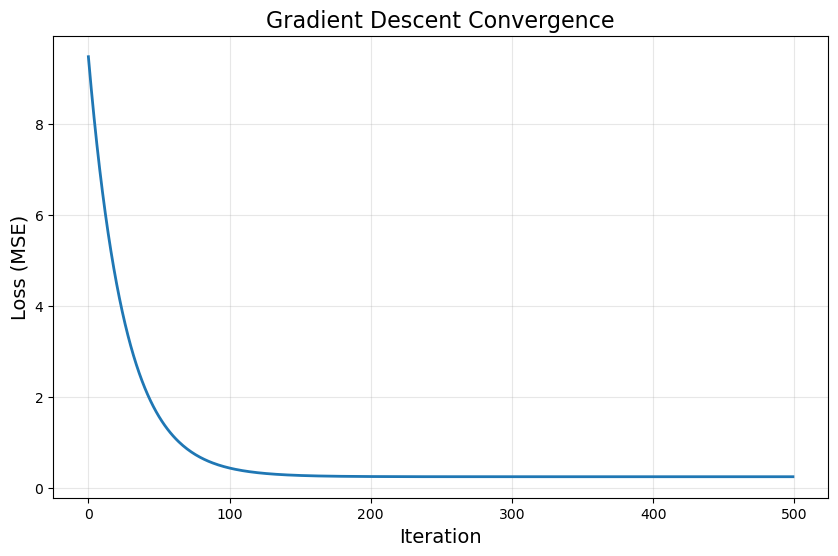

In [11]:
# Initialize parameters
beta_gd = np.zeros(p + 1)  # Start at zero
eta = 0.01  # Learning rate
num_iterations = 500

# Store loss history for plotting
loss_history = []

# Gradient descent loop
for iteration in range(num_iterations):
    # Compute predictions
    y_pred = X @ beta_gd
    
    # Compute loss (MSE)
    loss = np.mean((y - y_pred)**2)
    loss_history.append(loss)
    
    # Compute gradient
    gradient = (2/n) * X.T @ (y_pred - y)
    
    # Update parameters
    beta_gd = beta_gd - eta * gradient
    
    # Print progress every 100 iterations
    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration + 1}: Loss = {loss:.6f}")


print("GRADIENT DESCENT")
print(f"Estimated parameters β: {beta_gd}")
print(f"True parameters β:      {beta_true}")
print(f"Difference:             {beta_gd - beta_true}")
print(f"Max absolute error in  β :     {np.max(np.abs(beta_gd - beta_true)):.2e}")

# Plot loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(loss_history, linewidth=2)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Loss (MSE)', fontsize=14)
plt.title('Gradient Descent Convergence', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

We have more to learn, but hopefully, this small journey through linear regression has prepared us well to study numerical optimization in greater depth.


In [1]:
# Plotly is giving matplotlib some pains, try resetting
# Reset Matplotlib configuration after Plotly
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Restore animation settings
plt.rcParams['animation.html'] = 'html5'
plt.rcParams['animation.writer'] = 'ffmpeg'
plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'

print("Matplotlib configuration reset for animations")

Matplotlib configuration reset for animations
